In [1]:
import math

In [2]:
def gini(samples):
    samples_sum = sum(samples)
    score = 0
    probas = []
    for sample in samples:
        proba = sample / samples_sum
        probas.append(proba)
    for proba in probas:
        score += proba * (1 - proba)
    return score

In [3]:
def entropy(samples):
    samples_sum = sum(samples)
    score = 0
    probas = []
    for sample in samples:
        proba = sample / samples_sum
        probas.append(proba)
    for proba in probas:
        if proba > 0:
            score += proba * math.log(proba)
    return -1 * score

In [4]:
sample = [75, 100, 125]
gini(sample), entropy(sample)

(0.6527777777777777, 1.0775563270668007)

In [5]:
import pandas as pd

In [6]:
data = pd.read_csv("train.csv")

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data = data[["Survived", "Pclass", "Sex"]]

In [9]:
data.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


In [10]:
sex_mapping = {
    "female": 0,
    "male": 1
}
data.Sex = data.Sex.map(sex_mapping)

In [11]:
data

,Survived,Pclass,Sex
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1
...,...,...,...
886,0,2,1
887,1,1,0
888,0,3,0
889,1,1,1


In [12]:
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
dtypes: int64(3)
memory usage: 21.0 KB


In [14]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
gini([549, 342])

0.4730129578614427

In [16]:
entropy([549, 342])

0.6659119735267652

In [17]:
x = data[data.Pclass <= 1.5]
print(x.shape)
print(x.Survived.value_counts())

(216, 3)
1    136
0     80
Name: Survived, dtype: int64


In [18]:
gini([80, 136])

0.4663923182441701

In [19]:
x = data[data.Pclass > 1.5]
print(x.shape)
print(x.Survived.value_counts())

(675, 3)
0    469
1    206
Name: Survived, dtype: int64


In [20]:
gini([469, 206])

0.4240943758573388

In [21]:
x = data[data.Pclass <= 2.5]
print(x.shape)
print(x.Survived.value_counts())

(400, 3)
1    223
0    177
Name: Survived, dtype: int64


In [22]:
gini([177, 223])

0.4933875

In [23]:
x = data[data.Pclass > 2.5]
print(x.shape)
print(x.Survived.value_counts())

(491, 3)
0    372
1    119
Name: Survived, dtype: int64


In [24]:
gini([372, 119])

0.36724586342349663

In [25]:
x = data[data.Sex <= 0.5]
print(x.shape)
print(x.Survived.value_counts())

(314, 3)
1    233
0     81
Name: Survived, dtype: int64


In [26]:
gini([81, 233])

0.38283500344841576

In [27]:
x = data[data.Sex > 0.5]
print(x.shape)
print(x.Survived.value_counts())

(577, 3)
0    468
1    109
Name: Survived, dtype: int64


In [28]:
gini([468, 109])

0.3064437162277843

In [29]:
p1 = 0.383
p2 = 0.314
s1 = 306
s2 = 577
(p1 * s1 + p2 * s2) / (s1 + s2)

0.3379116647791619

In [30]:
x = data[(data.Sex <= 0.5) & (data.Pclass <= 1.5)]
print(x.shape)
print(x.Survived.value_counts())

(94, 3)
1    91
0     3
Name: Survived, dtype: int64


In [31]:
gini([3, 91])

0.06179266636487097

In [32]:
x = data[(data.Sex <= 0.5) & (data.Pclass > 1.5)]
print(x.shape)
print(x.Survived.value_counts())

(220, 3)
1    142
0     78
Name: Survived, dtype: int64


In [33]:
gini([78, 142])

0.45768595041322313

In [34]:
p1 = 0.061
p2 = 0.457
s1 = 94
s2 = 220
(p1 * s1 + p2 * s2) / (s1 + s2)

0.3384522292993631

In [35]:
x = data[(data.Sex <= 0.5) & (data.Pclass <= 2.5)]
print(x.shape)
print(x.Survived.value_counts())

(170, 3)
1    161
0      9
Name: Survived, dtype: int64


In [36]:
gini([9, 161])

0.10027681660899657

In [37]:
x = data[(data.Sex <= 0.5) & (data.Pclass > 2.5)]
print(x.shape)
print(x.Survived.value_counts())

(144, 3)
1    72
0    72
Name: Survived, dtype: int64


In [38]:
gini([72, 72])

0.5

In [39]:
p1 = 0.100
p2 = 0.500
s1 = 170
s2 = 144
(p1 * s1 + p2 * s2) / (s1 + s2)

0.28343949044585987

In [40]:
x = data[(data.Sex > 0.5) & (data.Pclass <= 1.5)]
print(x.shape)
print(x.Survived.value_counts())

(122, 3)
0    77
1    45
Name: Survived, dtype: int64


In [41]:
x = data[(data.Sex > 0.5) & (data.Pclass > 1.5)]
print(x.shape)
print(x.Survived.value_counts())

(455, 3)
0    391
1     64
Name: Survived, dtype: int64


In [42]:
x = data[(data.Sex > 0.5) & (data.Pclass <= 2.5)]
print(x.shape)
print(x.Survived.value_counts())

(230, 3)
0    168
1     62
Name: Survived, dtype: int64


In [43]:
x = data[(data.Sex > 0.5) & (data.Pclass > 2.5)]
print(x.shape)
print(x.Survived.value_counts())

(347, 3)
0    300
1     47
Name: Survived, dtype: int64


In [44]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

In [45]:
features = ["Sex", "Pclass"]
model = DecisionTreeClassifier()
model.fit(data[features], data.Survived)

DecisionTreeClassifier()

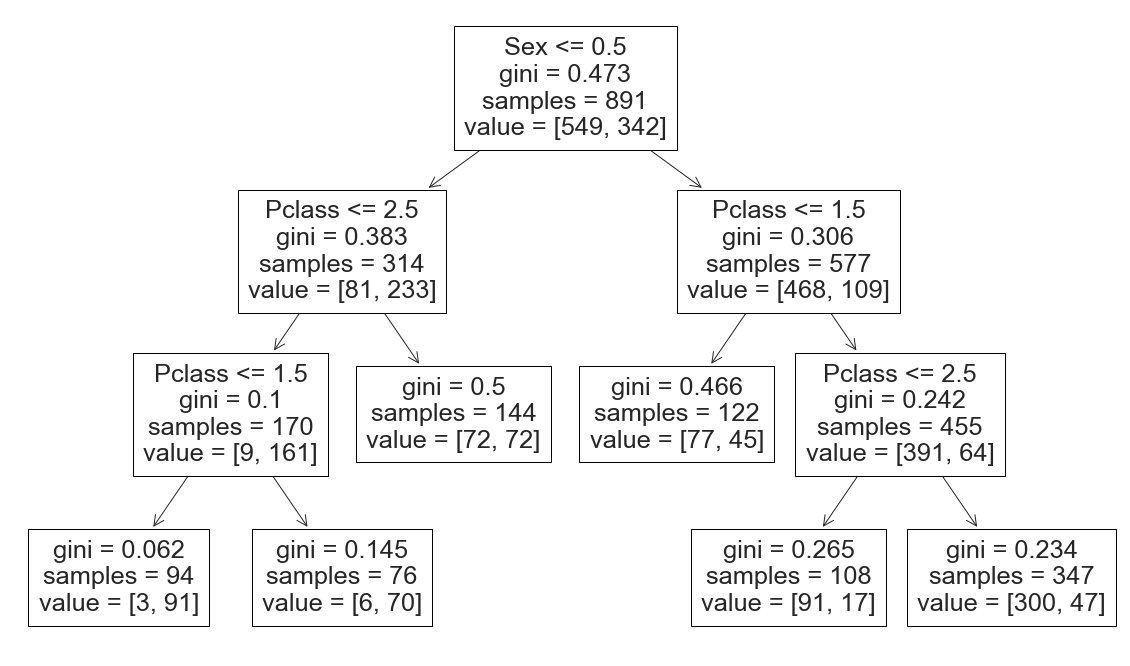

In [46]:
plt.figure(figsize = (20, 12))
plot_tree(model, feature_names=features)
plt.show()